# Interpolating chemical equilibrium abundances

To set the abundance of atmospheric absorbers we need to make assumptions on the atmospheric composition. When fitting exoplanet spectra, one option is to let the composition float freely, and tune it to values that best fit the data. Alternatively, one can turn to chemical models that calculate atmospheric abundances from the atmospheric elemental composition and the chemical reactions that link these elements and chemical reactant species. In the atmosphere of an exoplanet, which is inherently three-dimensional and dynamic, mixing and advection processes complicate this picture, because the chemical abundances inferred from spectra are not necessarily representative of the pressures and temperatures probed locally by the observation. In addition, the radiation field of the host star may influence the abundance and therefore opacity structure of the atmosphere, by dissociating or ionizing chemical species, which can then give rise to photochemically produced chemical species, or form photochemical hazes. In this picture, using chemical equilibrium abundances, which means the steady state chemical composition of the atmosphere when treating its layers as isolated and independent (no advection/mixing/photochemistry), appears unwise.

Yet, calculating chemical equilibrium abundances may still serve as a useful starting point for initializing abundances in planetary atmospheres. In certain conditions, for example for planets hot enough such that mixing is negligible, chemical equilibrium abundances can even be sufficient to accurately describe the abundances in the atmospheric region probed by observations.

Here we show how to use our ``chemistry.pre_calculated_chemistry`` subpackage. This package interpolates the abundances of the most important (i.e., spectrally active and abundant) species from a large chemical equilibrium table as a function of pressure, temperature, metallicity [Fe/H] (where [Fe/H]=0 is solar) and cabon-to-oxygen number ratio (C/O). A C/O $\sim 0.55$ is the solar value, see, for example, [Asplund et al. (2009)](https://ui.adsabs.harvard.edu/abs/2009ARA%26A..47..481A/abstract).

<div class="alert alert-info">

``chemistry.pre_calculated_chemistry`` **also contains a simple quenching implementation**. This means that a quench pressure can be specified below which (so for higher atmospheric altitudes) the abundances of H$_2$O, CH$_4$ and CO are taken to be constant, following the reasoning in, for example, [Zahnle & Marley (2014)](https://ui.adsabs.harvard.edu/abs/2014ApJ...797...41Z/abstract). In principle, you can quench even more species by manually setting their abundances constant above a given altitude, once you have the abundance dictionary returned by ``chemistry.pre_calculated_chemistry``.

</div>

<div class="alert alert-info">

The abundance table in ``chemistry.pre_calculated_chemistry`` has been calculated with [easyCHEM](https://easychem.readthedocs.io/en/latest/), which is our open-source Python package for calculating chemical equilibrium abundances. easyCHEM has been first described in [Mollière et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017A%26A...600A..10M/abstract), and it implements the methods described for NASA's CEA code, see [Gordon & McBride (1994)](https://ntrs.nasa.gov/citations/19950013764). easyCHEM has been benchmarked as the chemical equilibrium tool of petitCODE in [Baudino et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017ApJ...850..150B/abstract). <center><a href="https://easychem.readthedocs.io/en/latest/"><img src="images/easychem.png" alt="easyCHEM logo" /></a></center>
</div>

The grid dimensions of the ``chemistry.pre_calculated_chemistry`` abundance table are $T \in [60, 4000]~{\rm K}$, with 100 equidistant temperature points, $P \in [10^{-8}, 1000]~{\rm bar}$, with 100 pressure points spaced equidistantly in log space,  ${\rm C/O} \in [0.1, 1.6]$, with 20 equidistant points, and ${\rm [Fe/H]} \in [-1,3]$, with 40 equidistant points.  In ``chemistry.pre_calculated_chemistry`` the C/O is changed by varying the oxygen content after all metal species (so all elements except for H and He) have been scaled by $10^{\rm [Fe/H]}$. The total list of reactant species included was H, H$_2$, He, O, C, N, Mg, Si, Fe, S, Al, Ca, Na, Ni, P, K, Ti, CO, OH, SH, N$_2$, O$_2$, SiO, TiO, SiS, H$_2$O, C$_2$, CH, CN, CS, SiC, NH, SiH, NO, SN, SiN, SO, S$_2$, C$_2$H, HCN, C$_2$H$_2$ (acetylene), CH$_4$, AlH, AlOH, Al$_2$O, CaOH, MgH, Mg, OH, PH$_3$, CO$_2$, TiO$_2$, Si$_2$C, SiO$_2$, FeO, NH$_2$, NH$_3$, CH$_2$, CH$_3$, H$_2$S, VO, VO$_2$, NaCl, KCl, e-, H+, H-, Na+, K+, PH$_2$, P$_2$, PS, PO, P$_4$O$_6$, PH, V, FeH, VO(c), VO(L), MgSiO$_3$(c), SiC(c), Fe(c), Na$_2$S(c), KCL(c), Fe(L), SiC(L), MgSiO$_3$(L), H$_2$O(L), H$_2$O(c), TiO(c), TiO(L), TiO$_2$(c), TiO$_2$(L), H$_3$PO$_4$(c), H$_3$PO$_4$(L), where (c) stands for solid and (L) for liquid species. To conserve space only the mass fractions of the following species are tabulated for use in ``chemistry.pre_calculated_chemistry``: H$_2$, He, CO, H$_2$O, HCN, C$_2$H$_2$ (acetylene), CH$_4$, PH$_3$, CO$_2$, NH$_3$, H$_2$S, VO, TiO, Na, K, SiO, e-, H-, H, FeH, MMW, nabla_ad. MMW denotes the mean molar mass in the atmosphere. nabla_ad is the moist adiabatic lapse rate $\nabla_{\rm ad} = (\partial {\rm ln}T/\partial {\rm ln}P)_{\rm ad}$, determined as described in [Mollière et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020A%26A...640A.131M/abstract).

<div class="alert alert-warning">

**Abundances in** ``chemistry.pre_calculated_chemistry`` **are in units of mass fractions**, not number fractions (aka volume mixing ratios, VMRs). You can convert between mass fractions and VMRs by using
\begin{equation}
X_i = \frac{\mu_i}{\mu}n_i,
\end{equation}
where $X_i$ is the mass fraction of species $i$, $\mu_i$ the molar mass of a molecule/atom/ion/... of species $i$, $\mu$ is the atmospheric mean molar mass, and $n_i$ is the VMR of species $i$. This is implemented in `petitRADTRANS.chemistry.utils.mass_fractions2volume_mixing_ratios()` and `petitRADTRANS.chemistry.utils.volume_mixing_ratios2mass_fractions()`.

</div>

## Example

Here we will give some examples for how to interpolate chemical abundances using ``chemistry.pre_calculated_chemistry``.

We begin by loading the relevant packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from petitRADTRANS.chemistry.pre_calculated_chemistry import PreCalculatedEquilibriumChemistryTable
from petitRADTRANS import physical_constants as cst

plt.rcParams['figure.figsize'] = (10, 6)

chem = PreCalculatedEquilibriumChemistryTable()

Next, we define an atmospheric temperature and abundance structure, following an example similar to what is shown in ["Getting Started"](./getting_started.ipynb).

Text(0, 0.5, 'P (bar)')

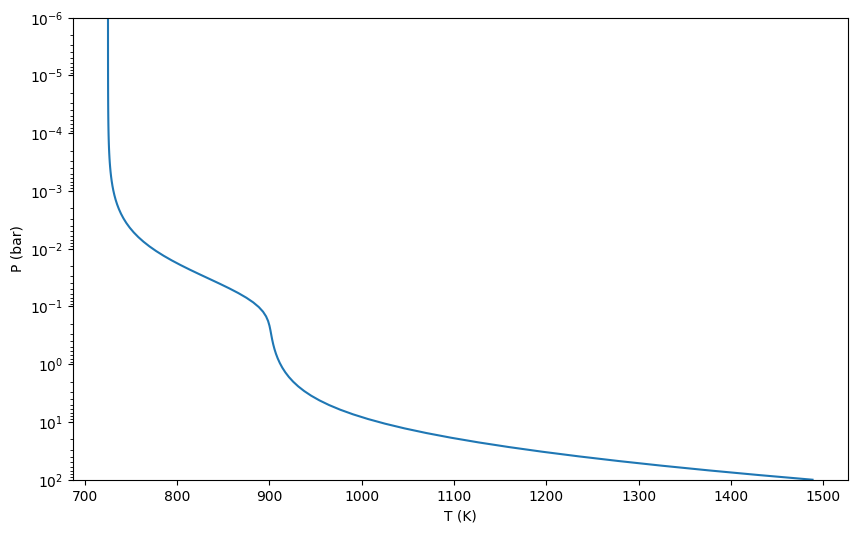

In [2]:
from petitRADTRANS.physics import temperature_profile_function_guillot_global

pressures = np.logspace(-6, 2, 100)
reference_gravity = 10 ** 2.45
infrared_mean_opacity = 0.01
gamma = 0.4
intrinsic_temperature = 200
equilibrium_temperature = 800

temperatures = temperature_profile_function_guillot_global(
    pressures=pressures, 
    infrared_mean_opacity=infrared_mean_opacity, 
    gamma=gamma,
    gravities=reference_gravity, 
    intrinsic_temperature=intrinsic_temperature,
    equilibrium_temperature=equilibrium_temperature
)

plt.plot(temperatures, pressures)
plt.yscale('log')
plt.ylim([1e2, 1e-6])
plt.xlabel('T (K)')
plt.ylabel('P (bar)')

Now we calculate the abundances. Note that the input parameters temperature, pressure, [Fe/H] and C/O are all arrays, and must be defined at every layer, but usually C/O and [Fe/H] are not vertically varying in the atmosphere. Here we chose a solar metallicity and C/O.

In [3]:
co_ratios = 0.55 * np.ones_like(pressures)
log10_metallicities = 0.0 * np.ones_like(pressures)

mass_fractions, mean_molar_mass, nabla_ad = chem.interpolate_mass_fractions(
    co_ratios=co_ratios,
    log10_metallicities=log10_metallicities,
    temperatures=temperatures,
    pressures=pressures,
    full=True
)

Loading chemical equilibrium chemistry table from file '/home/dblain/petitRADTRANS/input_data/pre_calculated_chemistry/equilibrium_chemistry/equilibrium_chemistry.chemtable.petitRADTRANS.h5'... Done.


This is what the ``full`` boolean flag stands for (nominal value is `False`):
```
full:
    if True, return the pre-calculated mean molar mass and logarithmic derivative of temperature with
    respect to pressure in the adiabatic case (nabla_ad) in addition to the pre-calculated mass fractions
```
Quenching is turned on by using the optional `carbon_pressure_quench` keyword argument (nominal value is `None`):
```
carbon_pressure_quench:
    (bar) pressure at which to put a simplistic carbon-bearing species quenching
```
for `pressures_bar < carbon_pressure_quench` the abundances of H$_2$O, CH$_4$ and CO are then taken to be constant.

Lets plot the abundances:

Text(0, 0.5, 'P (bar)')

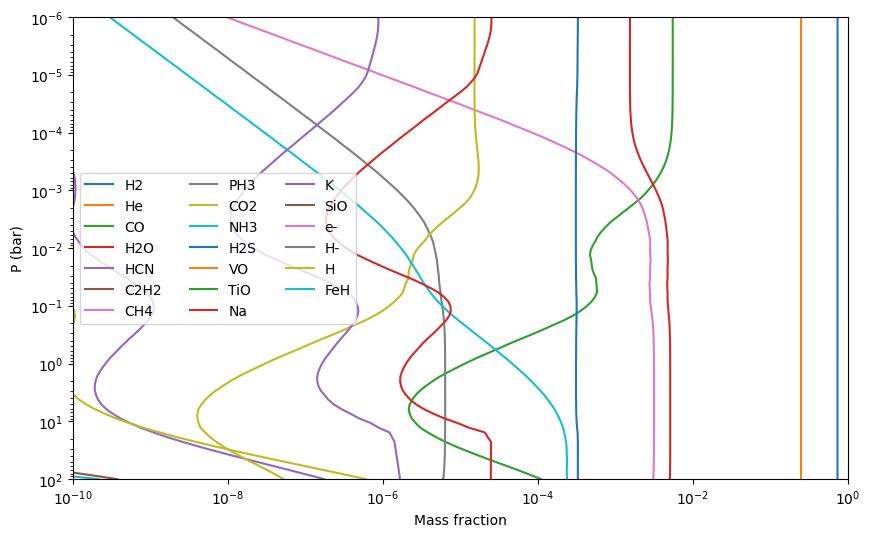

In [4]:
plt.yscale('log')
plt.xscale('log')
plt.ylim([100, 1e-6])
plt.xlim([1e-10, 1])

for species in mass_fractions.keys():
    plt.plot(mass_fractions[species], pressures, label=species)
        
plt.legend(loc='best', ncol=3)
plt.xlabel('Mass fraction')
plt.ylabel('P (bar)')

Also the MMW and adiabatic temperature gradient are accessible, where the former turns out to be vertically constant for this atmosphere:

Text(0, 0.5, 'P (bar)')

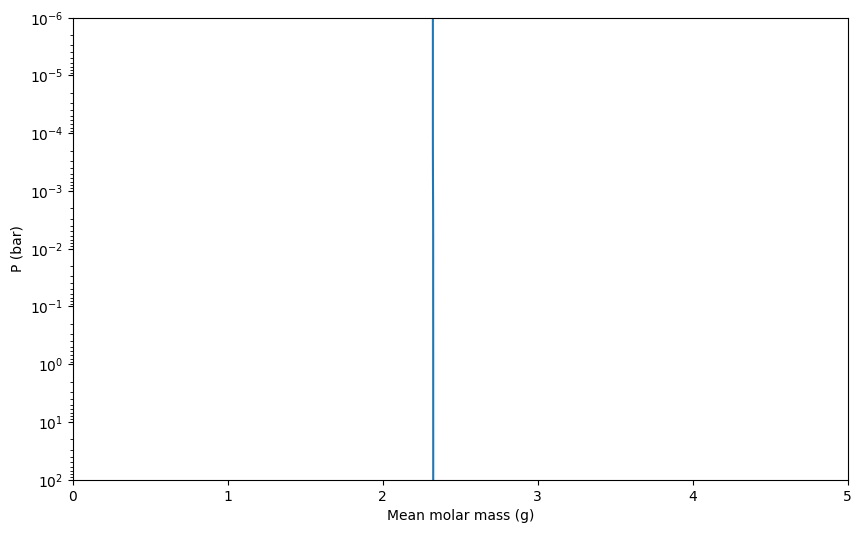

In [5]:
plt.yscale('log')
plt.ylim([100, 1e-6])
plt.xlim([0,5])

plt.plot(mean_molar_mass, pressures, label=species)
        
plt.xlabel('Mean molar mass (g)')
plt.ylabel('P (bar)')

Text(0, 0.5, 'P (bar)')

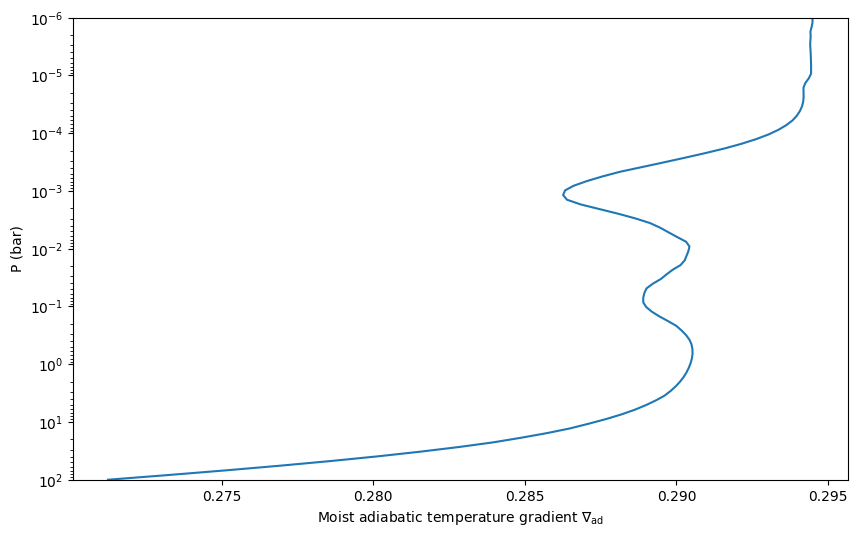

In [6]:
plt.yscale('log')
plt.ylim([100, 1e-6])

plt.plot(nabla_ad, pressures, label=species)
        
plt.xlabel(r'Moist adiabatic temperature gradient $\nabla_{\rm ad}$')
plt.ylabel('P (bar)')

As a test, we can also plot abundances at a given pressure, temperature, C/O, as a function of metallicity:

In [7]:
log10_metallicities = np.linspace(-2, 3, 100)
pressures_constant = np.ones_like(log10_metallicities) * 1e-1
temperatures_constant = np.ones_like(log10_metallicities) * 900
co_ratios = 0.55 * np.ones_like(log10_metallicities)
    
mass_fractions, mean_molar_mass, nabla_ad = chem.interpolate_mass_fractions(
    co_ratios=co_ratios,
    log10_metallicities=log10_metallicities,
    temperatures=temperatures_constant,
    pressures=pressures_constant,
    full=True
)

Text(0.5, 1.0, 'T = 900 K, P = 0.1 bar, C/O = 0.55')

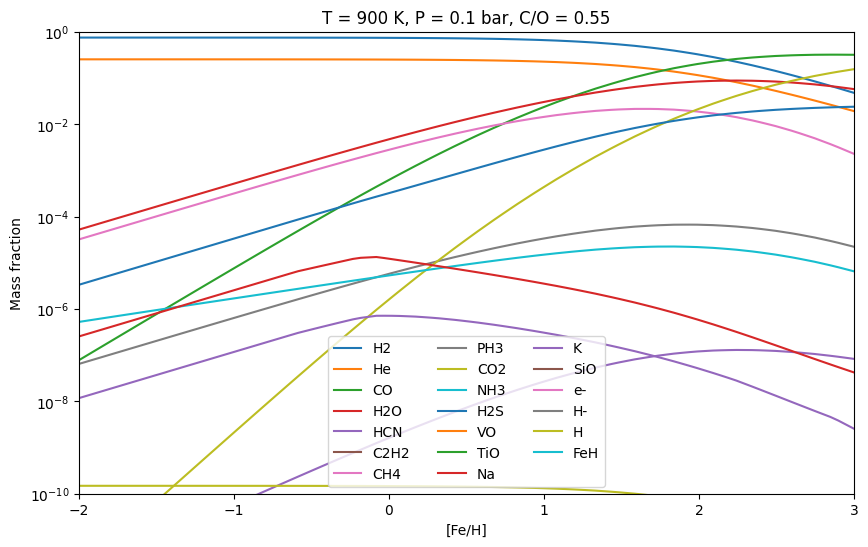

In [8]:
plt.yscale('log')
plt.ylim([1e-10, 1])
plt.xlim([-2, 3])

for species in mass_fractions.keys():
    plt.plot(log10_metallicities, mass_fractions[species], label=species)
        
plt.legend(loc='best', ncol=3)
plt.ylabel('Mass fraction')
plt.xlabel('[Fe/H]')
plt.title('T = 900 K, P = 0.1 bar, C/O = 0.55')

This is the mean molar mass as a function of metallicity:

Text(0.5, 1.0, 'T = 900 K, P = 0.1 bar, C/O = 0.55')

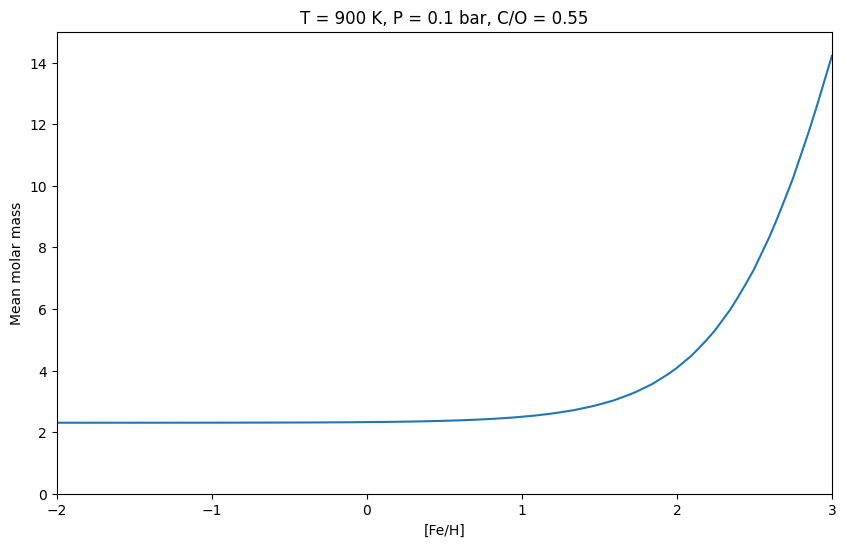

In [9]:
plt.xlim([-2, 3])
plt.ylim([0, 15])

plt.plot(log10_metallicities, mean_molar_mass)

plt.ylabel('Mean molar mass')
plt.xlabel('[Fe/H]')
plt.title('T = 900 K, P = 0.1 bar, C/O = 0.55')

Next we plot the mass fractions as a function of the C/O ratio, at solar metallicity:

In [10]:
co_ratios = np.linspace(0.1, 1.6, 100)
log10_metallicities = 0.0 * np.ones_like(co_ratios)
pressures_constant = np.ones_like(co_ratios) * 1e-1
temperatures_constant = np.ones_like(co_ratios)*1400
    
mass_fractions, mean_molar_mass, nabla_ad = chem.interpolate_mass_fractions(
    co_ratios=co_ratios,
    log10_metallicities=log10_metallicities,
    temperatures=temperatures_constant,
    pressures=pressures_constant,
    full=True
)

Text(0.5, 1.0, 'T = 1400 K, P = 0.1 bar, [Fe/H] = 0')

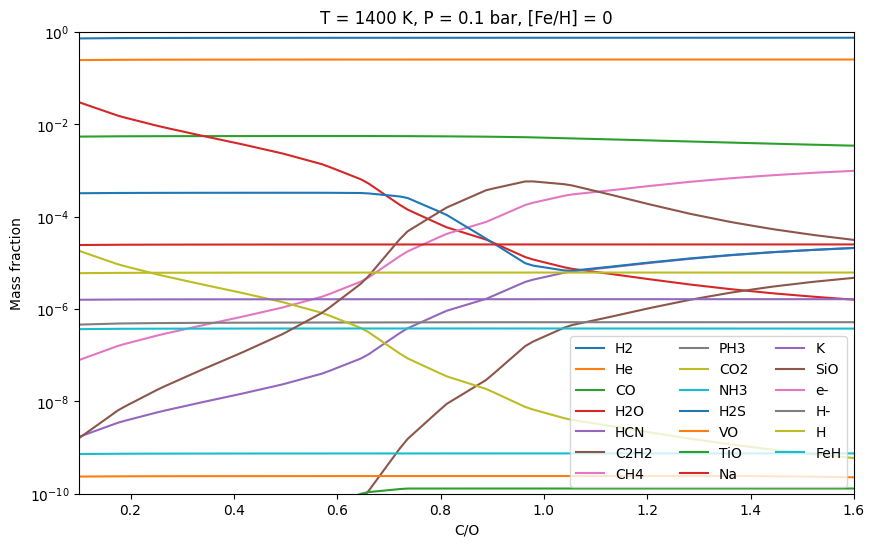

In [11]:
plt.yscale('log')
plt.ylim([1e-10, 1])
plt.xlim([0.1, 1.6])

for species in mass_fractions.keys():
    plt.plot(co_ratios, mass_fractions[species], label=species)
        
plt.legend(loc='lower right', ncol=3)
plt.ylabel('Mass fraction')
plt.xlabel('C/O')
plt.title('T = 1400 K, P = 0.1 bar, [Fe/H] = 0')

Finally, we show an example with quenching here, assuming that the CH$_4$, H$_2$O and CO abundances are constant in for pressures below 1 bar. We will use the temperature structure from above again.

In [12]:
# Nominal case:
co_ratios = 0.55 * np.ones_like(pressures)
log10_metallicities = 0.0 * np.ones_like(pressures)

mass_fractions = chem.interpolate_mass_fractions(
    co_ratios=co_ratios,
    log10_metallicities=log10_metallicities,
    temperatures=temperatures,
    pressures=pressures
)

# Quenching case:
mass_fractions_quench = chem.interpolate_mass_fractions(
    co_ratios=co_ratios,
    log10_metallicities=log10_metallicities,
    temperatures=temperatures,
    pressures=pressures,
    carbon_pressure_quench=1.0
)

Text(0.5, 1.0, 'Quenching')

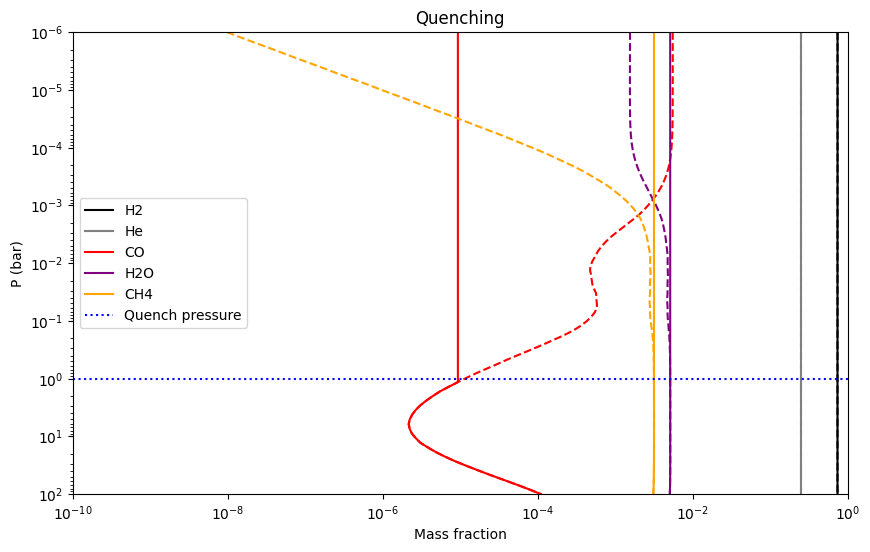

In [13]:
plt.yscale('log')
plt.xscale('log')
plt.ylim([100, 1e-6])
plt.xlim([1e-10, 1])

plt.plot(mass_fractions['H2'], pressures, linestyle='--', color='black')
plt.plot(mass_fractions_quench['H2'], pressures, label='H2', linestyle='-', color='black')
plt.plot(mass_fractions['He'], pressures, linestyle='--', color='gray')
plt.plot(mass_fractions_quench['He'], pressures, label='He', linestyle='-', color='gray')
plt.plot(mass_fractions['CO'], pressures, linestyle='--', color='red')
plt.plot(mass_fractions_quench['CO'], pressures, label='CO', linestyle='-', color='red')
plt.plot(mass_fractions['H2O'], pressures, linestyle='--', color='purple')
plt.plot(mass_fractions_quench['H2O'], pressures, label='H2O', linestyle='-', color='purple')
plt.plot(mass_fractions['CH4'], pressures, linestyle='--', color='orange')
plt.plot(mass_fractions_quench['CH4'], pressures, label='CH4', linestyle='-', color='orange')

plt.axhline(1., color = 'blue', linestyle = ':', label = 'Quench pressure')

plt.legend(loc='best', ncol=1)
plt.xlabel('Mass fraction')
plt.ylabel('P (bar)')
plt.title("Quenching")